In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import math
import gc
import random

RESHAPED = 1
NB_CLASSES = 1
DROPOUT = 0.3
N_HIDDEN = 512
BATCH_SIZE = 15
EPOCHS = 5
VERBOSE = 1
VALIDATION_SPLIT = 0.25
TOTAL_DATA_POINTS = 100
EXPONENT = 2

counts = [1000., 10.]
# Probability of success.
probs = [.99]

#Want to make the schuffle happen the same way every time
tf.random.set_seed(5)
tf.random.shuffle(tf.range(5))


def get_dataset():
    rng = tf.random.Generator.from_seed(seed=234)
    randomNumbers = rng.truncated_normal(shape=[TOTAL_DATA_POINTS], mean=0.5, stddev=.05)
    return randomNumbers

random_dataset = get_dataset()
            
def convert_to_train_test_data(dataset, test_percent = 0.15):
    point_number = []
    total_independent = []
    total_dependent = []
    count = 1
    for i in range(1, TOTAL_DATA_POINTS):
        point_number.append(i)
    random.shuffle(point_number)
    
    for i in point_number:
        if (int(i/10) == i/10):
            total_dependent.append(-1000) 
        else:
            total_dependent.append((i ** EXPONENT) * dataset[i])
        total_independent.append(i ** EXPONENT)
            
    testRecordCount = int(round(test_percent*len(total_independent)))
    return point_number[testRecordCount:], total_independent[testRecordCount:], total_dependent[testRecordCount:], point_number[:testRecordCount], total_independent[:testRecordCount], total_dependent[:testRecordCount]
    
x_train, x_train_modified, y_train, x_test, x_test_modified, y_test = convert_to_train_test_data(random_dataset, test_percent=0.15)


def createModel(lossFunction):
    #Switch to a learning_rate of 0.001 to see MSLE get "stuck"
    opt = keras.optimizers.RMSprop(learning_rate=0.0001)

    model = tf.keras.models.Sequential()
    model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), name='input_dense_layer', activation='relu'))
    model.add(keras.layers.Dropout(DROPOUT))
    model.add(keras.layers.Dense(N_HIDDEN, name='hidden_dense_layer', activation='relu'))
    model.add(keras.layers.Dropout(DROPOUT))
    model.add(keras.layers.Dense(NB_CLASSES, name='output_dense_layer'))
    model.compile(optimizer=opt, loss=lossFunction, metrics=['accuracy'])
    
    return model
    
def displayResults(history):
    train_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    epochs = range(1, len(validation_loss)+1)

    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.plot(epochs, train_loss, label='train loss')
    ax.plot(epochs, validation_loss, label='validation loss')
    ax.set_xlabel('epoch')  # Add an x-label to the axes.
    ax.set_ylabel('loss')  # Add a y-label to the axes.
    ax.set_title("Simple Plot")  # Add a title to the axes.
    ax.legend() 

def showPrediction(model, x_train, x_train_modified, y_train, x_test, x_test_modified, y_test):
    NEXT_POINT = TOTAL_DATA_POINTS + 1
    FUTURE_INDEPENDANT = [NEXT_POINT ** EXPONENT]
    FUTURE_DEPENDANT = []

    PREDICTED_INDEPENDANT = []
    PREDICTED_DEPENDANT = []

    pred_traning = model.predict(np.array(x_train_modified))

    count = 0
    for deaths in pred_traning:
        PREDICTED_INDEPENDANT.append(x_train[count])
        PREDICTED_DEPENDANT.append(deaths)
        count += 1

    pred_validation = model.predict(np.array(x_test_modified))

    count = 0
    for deaths in pred_validation:
        PREDICTED_INDEPENDANT.append(x_test[count])
        PREDICTED_DEPENDANT.append(deaths)
        count += 1

    pred_dependant = model.predict(FUTURE_INDEPENDANT)

    for item in pred_dependant:
        FUTURE_DEPENDANT.append(item)
    
    print(FUTURE_DEPENDANT)
    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.plot(x_train, y_train, label='training data', linewidth=0, marker='.')
    ax.plot(x_test, y_test, label='test data', linewidth=0, marker='.')
    ax.plot(PREDICTED_INDEPENDANT, PREDICTED_DEPENDANT, label='prediction values', linewidth=0, marker='.')
    ax.plot([NEXT_POINT], FUTURE_DEPENDANT, label='future prediction', linewidth=0, marker='.')
    ax.set_xlabel('independent')  # Add an x-label to the axes.
    ax.set_ylabel('dependant')  # Add a y-label to the axes.
    ax.legend() 
    
print('done')

done


(84,)
(84,)
Epoch 1/5
5/5 [==============================] - 1s 189ms/step - loss: 3784327.7500 - accuracy: 0.0000e+00 - val_loss: 3077527.5000 - val_accuracy: 0.0000e+00
Epoch 2/5
5/5 [==============================] - 0s 34ms/step - loss: 2113129.7500 - accuracy: 0.0000e+00 - val_loss: 1817849.0000 - val_accuracy: 0.0000e+00
Epoch 3/5
5/5 [==============================] - 0s 37ms/step - loss: 1265127.6250 - accuracy: 0.0000e+00 - val_loss: 1410343.0000 - val_accuracy: 0.0000e+00
Epoch 4/5
5/5 [==============================] - 0s 37ms/step - loss: 1063304.6250 - accuracy: 0.0000e+00 - val_loss: 1121860.2500 - val_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 1248203.3750 - accuracy: 0.0000e+00

Test accuracy: 0.0
[array([4171.327], dtype=float32)]


3420

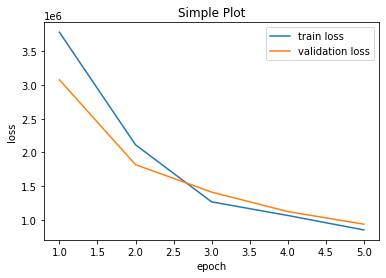

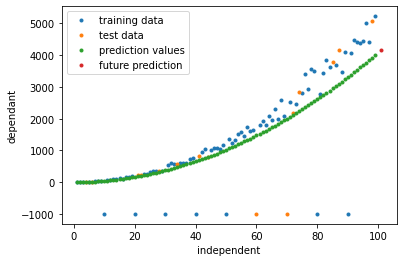

In [4]:
tf.random.set_seed(1234)
np.random.seed(0)
    
    
print(np.array(x_train).shape)
print(np.array(y_train).shape)

model = createModel('MSE')

history = model.fit(np.array(x_train_modified), np.array(y_train), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

test_loss, test_acc = model.evaluate(np.array(x_test_modified), np.array(y_test))
print()
print('Test accuracy:', test_acc)

displayResults(history)

showPrediction(model, x_train, x_train_modified, y_train, x_test, x_test_modified, y_test)

del model
tf.keras.backend.clear_session()

gc.collect()

Epoch 1/5
5/5 [==============================] - 0s 61ms/step - loss: 13.9289 - accuracy: 0.0000e+00 - val_loss: 1.5598 - val_accuracy: 0.0000e+00
Epoch 2/5
5/5 [==============================] - 0s 25ms/step - loss: 1.4585 - accuracy: 0.0000e+00 - val_loss: 1.1215 - val_accuracy: 0.0000e+00
Epoch 3/5
5/5 [==============================] - 0s 22ms/step - loss: 1.0347 - accuracy: 0.0000e+00 - val_loss: 0.8050 - val_accuracy: 0.0000e+00
Epoch 4/5
5/5 [==============================] - 0s 23ms/step - loss: 0.6954 - accuracy: 0.0000e+00 - val_loss: 0.6179 - val_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 0.4467 - accuracy: 0.0000e+00

Test accuracy: 0.0
[array([2616.428], dtype=float32)]


18089

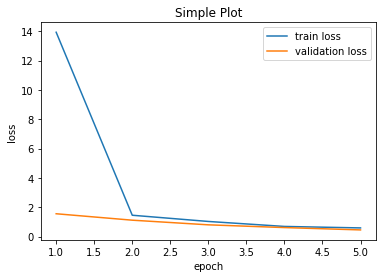

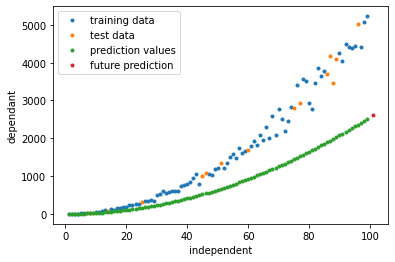

In [3]:
tf.random.set_seed(1234)
np.random.seed(0)

model = createModel('MSLE')

history = model.fit(np.array(x_train_modified), np.array(y_train), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

test_loss, test_acc = model.evaluate(np.array(x_test_modified), np.array(y_test))
print()
print('Test accuracy:', test_acc)

displayResults(history)

showPrediction(model, x_train, x_train_modified, y_train, x_test, x_test_modified, y_test)

del model
tf.keras.backend.clear_session()

gc.collect()

Epoch 1/5
5/5 [==============================] - 0s 55ms/step - loss: 1214.4216 - accuracy: 0.0000e+00 - val_loss: 1070.8922 - val_accuracy: 0.0000e+00
Epoch 2/5
5/5 [==============================] - 0s 23ms/step - loss: 695.0268 - accuracy: 0.0000e+00 - val_loss: 632.2377 - val_accuracy: 0.0000e+00
Epoch 3/5
5/5 [==============================] - 0s 25ms/step - loss: 354.9720 - accuracy: 0.0000e+00 - val_loss: 215.4196 - val_accuracy: 0.0000e+00
Epoch 4/5
5/5 [==============================] - 0s 24ms/step - loss: 193.8505 - accuracy: 0.0000e+00 - val_loss: 135.8388 - val_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 129.1037 - accuracy: 0.0000e+00

Test accuracy: 0.0
[array([4987.8716], dtype=float32)]


17878

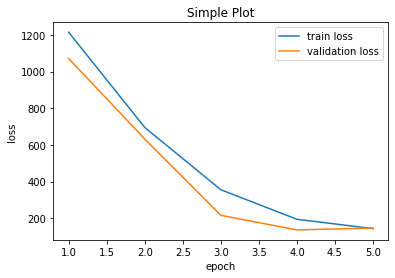

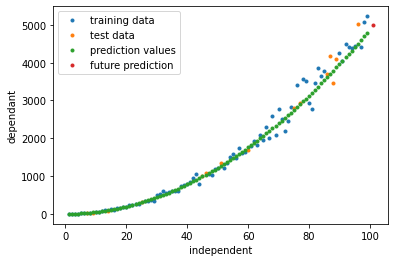

In [4]:
tf.random.set_seed(1234)
np.random.seed(0)

model = createModel('MAE')

history = model.fit(np.array(x_train_modified), np.array(y_train), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

test_loss, test_acc = model.evaluate(np.array(x_test_modified), np.array(y_test))
print()
print('Test accuracy:', test_acc)

displayResults(history)

showPrediction(model, x_train, x_train_modified, y_train, x_test, x_test_modified, y_test)

del model
tf.keras.backend.clear_session()

gc.collect()